In [92]:
import pandas as pd
import csv 
import torch.nn as nn
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np 

c_data=pd.read_csv(r"E:\PycharmProjects\Data_preprocess\pollution_cust_detail.csv")
c_data.head(-5)

,CustomerID,StateName,DistrictName,CityName,PINCode,AreaName,Acount date
0,50A741A9-9DCB-EC11-A7B5-000D3AF026BB,DELHI,SOUTH DELHI,SOUTH DELHI-DL,110080,SANGAM VIHAR,04-05-2022
1,8D90F470-54CC-EC11-A7B5-000D3AF026BB,HARYANA,GURUGRAM,GURUGRAM-HR,122002,DLF QE,05-05-2022
2,FDA1B6EC-2ECD-EC11-A7B5-000D3AF026BB,UTTAR PRADESH,LUCKNOW,LUCKNOW-UP,226002,ARJUNGANJ,06-05-2022
3,D78084D2-6471-ED11-81AC-6045BDAC54B1,DELHI,CENTRAL DELHI,DELHI CENTRAL-DL,110006,DELHI CENTRAL-DL,01-12-2022
4,BBA850DB-E1B7-EC11-983F-6045BD728D72,UTTAR PRADESH,GHAZIABAD,GHAZIABAD-UP,201012,GHAZIABAD-UP,09-04-2022
...,...,...,...,...,...,...,...
12154,FA0230A9-6A5A-ED11-9562-6045BDAC5348,MAHARASHTRA,MUMBAI,MUMBAI-MH,400037,ANTOP HILL,02-11-2022
12155,5BD1B097-4EF1-EC11-BB3C-6045BDAC55A8,HARYANA,FARIDABAD,FARIDABAD-HR,121002,BHASKOLA,21-06-2022
12156,1BDD702C-13F2-EC11-BB3C-6045BDAC55A8,DELHI,NORTH WEST DELHI,NORTH WEST DELHI-DL,110052,ASHOK VIHAR,22-06-2022
12157,8BCD938E-5F50-EC11-8F8E-6045BD733D00,DELHI,SOUTH WEST DELHI,SOUTH WEST DELHI-DL,110043,SOUTH WEST DELHI-DL,28-11-2021


In [93]:
c_purchase=pd.read_csv(r"E:\PycharmProjects\Data_preprocess\cust_purchase_data.csv")
c_purchase.head(-5)

,CustomerID,SKU,Category,brand,hil_invoicedate,SubCategory,sku_registration_date,Price
0,504DF931-5C14-EB11-8440-0003FF910015,GLS15I5FWSEL,LLOYD AIR CONDITIONER,LLOYD,04-06-2022,SPLIT 0.8-2.0 T INV 5S R-32,07-06-2022,56990.0
1,8CA46463-8717-EB11-8440-0003FF910015,GHGSIAOP184,HAVELLS SDA,HAVELLS,06-10-2021,STEAM IRON,18-02-2022,3395.0
2,DE614F31-2B18-EB11-8440-0003FF910015,AHCSXXW101,HAVELLS EWA,HAVELLS,26-09-2018,MODULAR SWITCH HAVELLS,01-01-2022,65.0
3,FADD2255-7322-EB11-8440-0003FF910015,GLW18B52WBEW,LLOYD AIR CONDITIONER,LLOYD,05-07-2022,WINDOW 0.8-2.0 T FIX 5S R-32,07-07-2022,42990.0
4,DA5A36DC-2951-E911-B047-0003FF9105D7,GHPTTAALBK00,HAVELLS GROOMING,HAVELLS,28-10-2021,TRIMMER,06-12-2022,1495.0
...,...,...,...,...,...,...,...,...
746163,3AEBAAA8-2AA8-EC11-826C-DC984003F382,GHWAPUTWH025,HAVELLS WATER HEATER,HAVELLS,10-12-2022,STORAGE WATER HEATER HAVELLS,20-12-2022,18190.0
746164,96CAFE1C-E8A8-EC11-826C-DC984003F382,GLS12I3FWSBP,LLOYD AIR CONDITIONER,LLOYD,29-05-2022,SPLIT 0.8-2.0 T INV 3S R-32,30-05-2022,45990.0
746165,943804AF-6BA9-EC11-826C-DC984003F382,FHCSYSTPWT48,HAVELLS FAN,HAVELLS,09-05-2022,CEILING FAN - SPECIAL FINISH HAVELLS FAN,16-05-2022,10550.0
746166,C405B883-70AA-EC11-826C-DC984003F382,FHCADSTMAR48,HAVELLS FAN,HAVELLS,17-05-2020,CEILING FAN - DECORATIVE HAVELLS FAN,23-03-2022,3650.0


In [94]:
c_merged_data = pd.merge(c_purchase, c_data, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
print(c_merged_data.shape)
c_merged_data.head(-15)


(28234, 14)


,CustomerID,SKU,Category,brand,hil_invoicedate,SubCategory,sku_registration_date,Price,StateName,DistrictName,CityName,PINCode,AreaName,Acount date
0,62F5D847-B647-EA11-B698-0003FF9107E4,FHCFESTEBR48,HAVELLS FAN,HAVELLS,10-03-2022,CEILING FAN - NON DECORATIVE HAVELLS FAN,20-03-2022,4305.0,BIHAR,PATNA,PATNA-BR,800001,BANK ROAD,05-02-2020
1,62F5D847-B647-EA11-B698-0003FF9107E4,FHCFESTEBR48,HAVELLS FAN,HAVELLS,10-03-2022,CEILING FAN - NON DECORATIVE HAVELLS FAN,20-03-2022,4785.0,BIHAR,PATNA,PATNA-BR,800001,BANK ROAD,05-02-2020
2,62F5D847-B647-EA11-B698-0003FF9107E4,FHCFESTEBR48,HAVELLS FAN,HAVELLS,10-03-2022,CEILING FAN - NON DECORATIVE HAVELLS FAN,20-03-2022,4650.0,BIHAR,PATNA,PATNA-BR,800001,BANK ROAD,05-02-2020
3,62F5D847-B647-EA11-B698-0003FF9107E4,FHCFESTEBR48,HAVELLS FAN,HAVELLS,11-03-2022,CEILING FAN - NON DECORATIVE HAVELLS FAN,20-03-2022,4650.0,BIHAR,PATNA,PATNA-BR,800001,BANK ROAD,05-02-2020
4,62F5D847-B647-EA11-B698-0003FF9107E4,FHCFESTEBR48,HAVELLS FAN,HAVELLS,11-03-2022,CEILING FAN - NON DECORATIVE HAVELLS FAN,20-03-2022,4785.0,BIHAR,PATNA,PATNA-BR,800001,BANK ROAD,05-02-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,7AFC3A34-8DBC-EC11-983F-6045BDAD5446,GLS18B32MXW1,LLOYD AIR CONDITIONER,LLOYD,10-06-2021,SPLIT 0.8-2.0 T FIX 3S R-32,18-04-2022,52990.0,HARYANA,FARIDABAD,FARIDABAD-HR,121009,FARIDABAD-HR,15-04-2022
28215,75FCC872-96BC-EC11-983F-6045BDAD5518,GLS18I36WSBP,LLOYD AIR CONDITIONER,LLOYD,26-07-2021,SPLIT 0.8-2.0 T INV 3S WIFI R-32,15-04-2022,59990.0,UTTAR PRADESH,KANPUR NAGAR,KANPUR-UP,208012,R K NAGAR,15-04-2022
28216,23E3A41B-32BB-EC11-9840-6045BDAD575B,GLS18I35WSHL,LLOYD AIR CONDITIONER,LLOYD,10-04-2022,SPLIT 0.8-2.0 T INV 3S WIFI R-32,05-05-2022,65990.0,DELHI,NORTH WEST DELHI,NORTH WEST DELHI-DL,110085,NORTH WEST DELHI-DL,13-04-2022
28217,11153AD0-D5B8-EC11-983F-6045BDAD5446,GLW19B52EW,LLOYD AIR CONDITIONER,LLOYD,04-06-2021,WINDOW 0.8-2.0 T FIX 5S R-22,11-04-2022,42990.0,DELHI,SOUTH WEST DELHI,SOUTH WEST DELHI-DL,110045,DABRI,10-04-2022


In [95]:
c_merged_data = c_merged_data[~c_merged_data['Category'].isin(['HAVELLS CP', 'HAVELLS CAPACITOR', 'HAVELLS MOTOR', 'STANDARD CP', 'SOLAR LSP', 'HAVELLS PLUM', 'STANDARD IP'])] #Drop these categories

le_sku = preprocessing.LabelEncoder()
le_sku.fit(c_merged_data.SKU.unique())
c_merged_data.SKU = le_sku.transform(c_merged_data.SKU)



le_cat = preprocessing.LabelEncoder()
le_cat.fit(c_merged_data.Category.unique())
c_merged_data.Category = le_cat.transform(c_merged_data.Category)

le_brand = preprocessing.LabelEncoder()
le_brand.fit(c_merged_data.brand.unique())
c_merged_data.brand = le_brand.transform(c_merged_data.brand)

le_cid = preprocessing.LabelEncoder()
le_cid.fit(c_merged_data.CustomerID.unique())
c_merged_data.CustomerID = le_cid.transform(c_merged_data.CustomerID)

c_merged_data['Price'] = c_merged_data['Price'].astype(int)



cat_wise_data = c_merged_data.copy(deep=True)

for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    df_temp = cat_wise_data[cat_wise_data['Category'] == i]
    cat_wise_data.loc[:, col] = df_temp['Price']
    cat_wise_data[col].fillna(0, inplace = True)


# (cat_wise_data.query("Category==(34,0,2)"))
cat_wise_data.sort_values('CustomerID', ascending = True)[:20]

transactions_per_user = cat_wise_data.groupby(by=['CustomerID'])['Price'].agg(['count','min','max','mean','sum'])
temp_df = transactions_per_user.copy(deep=True)

print(f'Category : User Count')
for i in range(0, len(le_cat_mapping.keys())):
    col = 'categ_{}'.format(i)
    temp_df.loc[:,col]= cat_wise_data.groupby(by=['CustomerID'])[col].sum()


c_merged_data['hil_invoicedate'] = pd.to_datetime(c_merged_data['hil_invoicedate'], format='%d-%m-%Y')

last_date = c_merged_data['hil_invoicedate'].max().date()

first_registration = pd.DataFrame(c_merged_data.groupby(by=['CustomerID'])['hil_invoicedate'].min())
last_purchase      = pd.DataFrame(c_merged_data.groupby(by=['CustomerID'])['hil_invoicedate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

temp_df.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['hil_invoicedate']
temp_df.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['hil_invoicedate']
temp_df.loc[:, 'DistrictName'] = pd.DataFrame(c_merged_data.groupby(by=['CustomerID'])['DistrictName'].min())


temp_df.sort_values('CustomerID', ascending = True)[:20]



Category : User Count


,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,...,categ_16,categ_17,categ_18,categ_19,categ_20,categ_21,categ_22,LastPurchase,FirstPurchase,DistrictName
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,1,62990,62990,62990.000000,62990,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174,174,LUCKNOW
1,3,4895,10440,8473.333333,25420,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103,126,LUCKNOW
2,2,3745,3945,3845.000000,7690,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454,454,LUCKNOW
3,1,5645,5645,5645.000000,5645,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179,179,VARANASI
4,4,9500,11250,10412.500000,41650,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503,503,NORTH WEST DELHI
5,1,47490,47490,47490.000000,47490,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336,336,SOUTH WEST DELHI
6,1,58990,58990,58990.000000,58990,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,181,PATNA
7,4,14785,17175,16021.250000,64085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344,344,SOUTH WEST DELHI
8,1,722,722,722.000000,722,722.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161,161,FARIDABAD


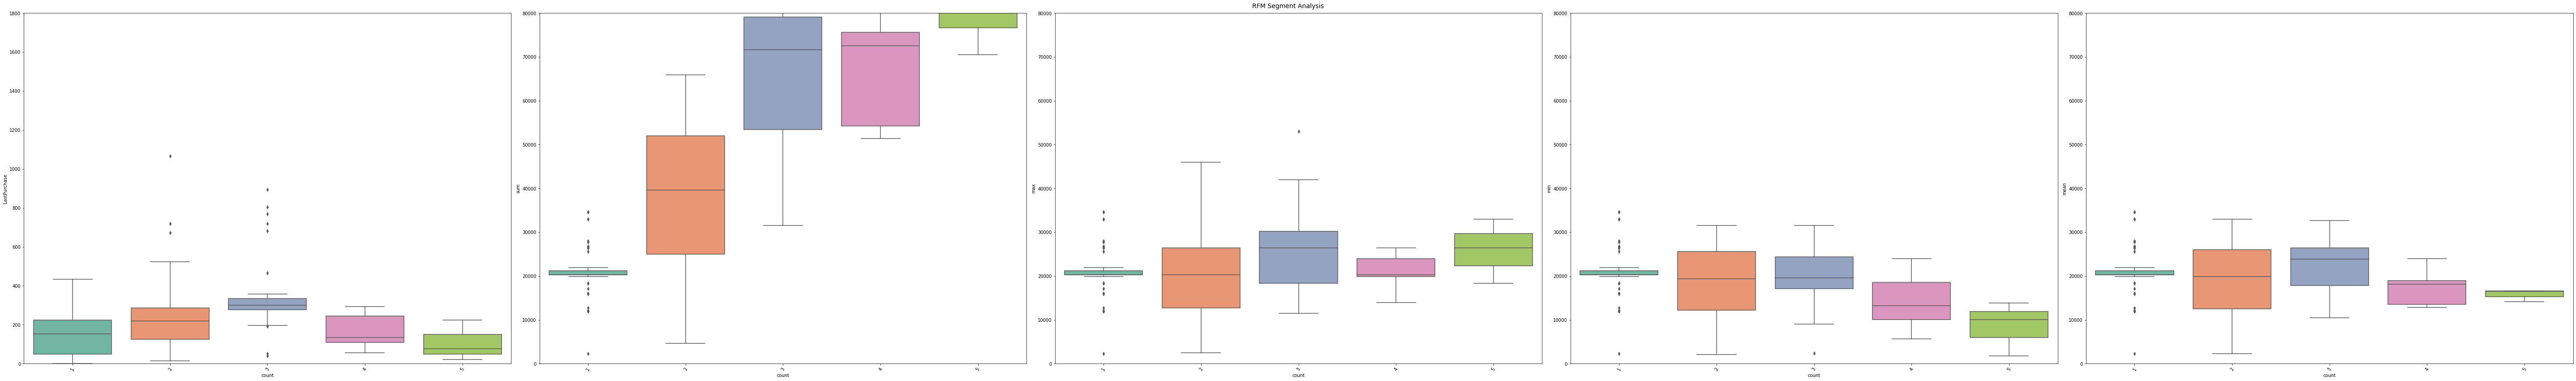

In [98]:
q1, q3 = np.percentile(temp_df['sum'], [5, 85])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

mask = (temp_df['sum'] >= lower_fence) & (temp_df['sum'] <= upper_fence) & (temp_df['categ_4']>0)

# Use the mask to filter the data
filtered_transactions_per_user = temp_df[mask]


fig, axes = plt.subplots(1, 5, figsize = (80, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['LastPurchase', 'sum', 'max', 'min', 'mean']
for idx, col in enumerate(feature_list):
    sns.boxplot(ax = axes[idx], data = filtered_transactions_per_user,
                x = 'count', y = feature_list[idx],
                palette= 'Set2')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    
    if idx == 10:
        axes[idx].set_ylim([0, 30])
    elif idx == 0:
        axes[idx].set_ylim([0, 1800])
    else:
        axes[idx].set_ylim([0, 80000])
plt.tight_layout()
plt.show()

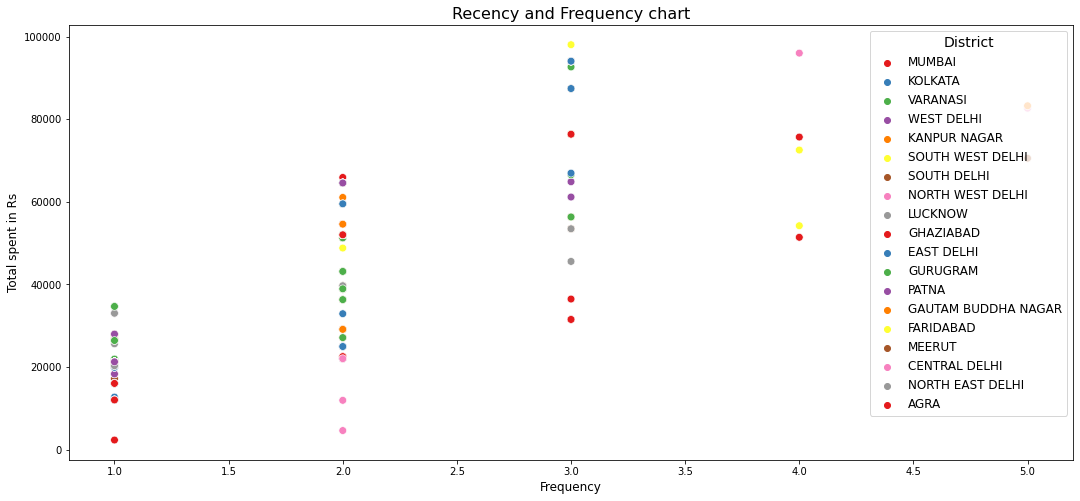

In [91]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = filtered_transactions_per_user,
                x = 'count',
                y = 'sum',
                hue ='DistrictName',
                palette = 'Set1',
                s = 60)
plt.title('Recency and Frequency chart', size = 16)
plt.xlabel('Frequency', size = 12)
plt.ylabel('Total spent in Rs', size = 12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(loc = 'best', fontsize = 12,
           title = 'District',title_fontsize=14)
plt.show()